<a href="https://colab.research.google.com/github/mcfatbeard57/Hands-On-ML-Tensor-FLow/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM



capable of performing linear or nonlinear classification, regression, and even
outlier detection.

## Linear SVM classification

### Large margin classification

In [1]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Notice that adding more training instances “off the street” will not affect the decision
boundary at all:

**SVMs are sensitive to the feature scales**

### Soft Margin Classification

In [2]:
# The objective is to
# find a good balance between keeping the street as large as possible and limiting the
# margin violations (i.e., instances that end up in the middle of the street or even on the
# wrong side)

**control this balance using the C hyperparameter**

***If your SVM model is overfitting, you can try regularizing it by
reducing C.***

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Unlike Logistic Regression classifiers, SVM classifiers do not output
probabilities for each class.

## NonLinear SVM classification

In [8]:
 # using polynomial features

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
))
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

### Polynomial Kernel

In [10]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

if your model is **overfitting**, you might want to reduce the polynomial degree. Conversely, if it is **underfitting**, you can try increasing it. 

The** hyperparameter coef0** controls how much the model is influenced by highdegree polynomials versus low-degree polynomials.

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

In [12]:
# use grid search to find the right hyperparameter values

## Gaussian RBF Kernel

In [13]:
rbf_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

### hyperparameters gamma (γ) and C.

Increasing
gamma makes the bell-shape curve narrower (see the left plot of Figure 5-8), and as a
result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. Conversely, a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influence,
and the decision boundary ends up smoother. So γ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting,
you should increase it (similar to the C hyperparameter).

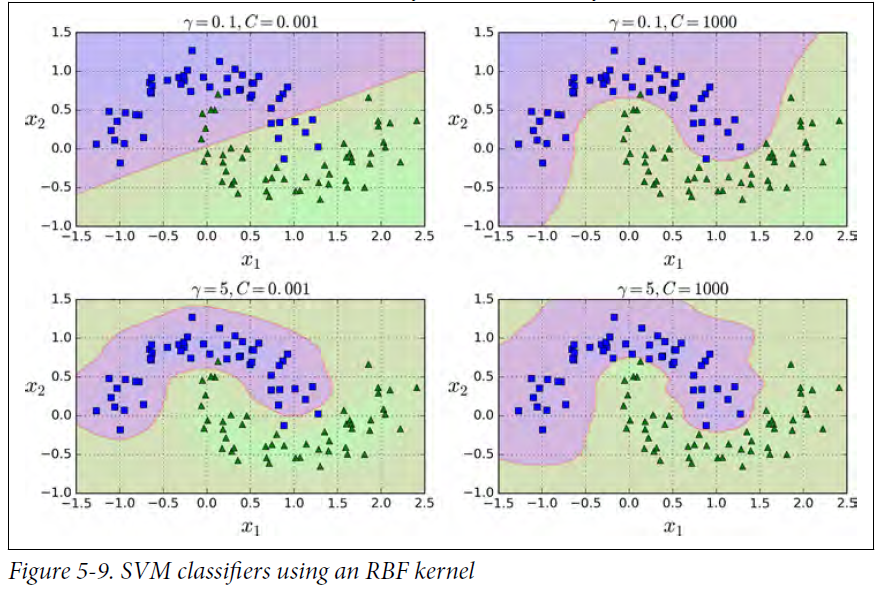

In [15]:
import matplotlib.pyplot as plt


In [18]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

# plt.figure(figsize=(11, 7))

# for i, svm_clf in enumerate(svm_clfs):
#     plt.subplot(221 + i)
#     plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
#     plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
#     gamma, C = hyperparams[i]
#     plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

# save_fig("moons_rbf_svc_plot")
# plt.show()

In [19]:
svm_clfs

[Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svm_clf',
                  SVC(C=0.001, break_ties=False, cache_size=200,
                      class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=0.1,
                      kernel='rbf', max_iter=-1, probability=False,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False), Pipeline(memory=None,
          steps=[('scaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svm_clf',
                  SVC(C=1000, break_ties=False, cache_size=200,
                      class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=0.1,
                      kernel='rbf', max_iter=-1, probability=False,
                      random_state=N

## How to choose kernel?

In [20]:
# Default one is inear kernel
# LinearSVC is faster ethan SVC(kernel = linear)
# If traing set is very large or has lots of features

In [21]:
# if training set is small try Gaussian

In [ ]:
# try cross validation and grid search for best hyper parameters
